# libraries and dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from prettytable import PrettyTable

# Iris Dataset

In [8]:
df = pd.read_csv('IRIS.csv')

In [10]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Data Exploration

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df.shape

(150, 5)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
duplicates_df = df[df.duplicated()]

if not duplicates_df.empty:
    print("Duplicates found in the dataset:")
    print(duplicates_df)
else:
    print("No duplicates found in the dataset.")
df = df.drop_duplicates()
# Verify that duplicates have been eliminated

duplicates_df = df[df.duplicated()]

if not duplicates_df.empty:
    print("Duplicates found in the dataset:")
    print(duplicates_df)
else:
    print("No duplicates found in the dataset.")
null_counts = df.isnull().sum()

if null_counts.any():
    print("Dataset has null values.")
    print("Columns with null values:")
    print(null_counts[null_counts > 0])
else:
    print("Dataset has no null values.")

Duplicates found in the dataset:
     sepal_length  sepal_width  petal_length  petal_width         species
34            4.9          3.1           1.5          0.1     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
142           5.8          2.7           5.1          1.9  Iris-virginica
No duplicates found in the dataset.
Dataset has no null values.


# Training and Testing

In [10]:
df['species'] = df['species'].map({'Iris-versicolor': 0, 'Iris-virginica': 1, 'Iris-setosa': 2})
X = df.drop(['species'], axis=1)
y = df['species']

In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print shapes of X_train, y_train, X_test, y_test
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (117, 4)
y_train shape: (117,)
X_test shape: (30, 4)
y_test shape: (30,)


In [14]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Multilayer Perceptron (Neural Network)
nn_model = MLPClassifier(max_iter=500, random_state=42)
nn_model.fit(X_train_scaled, y_train)
nn_train_predictions = nn_model.predict(X_train_scaled)
nn_train_accuracy = accuracy_score(y_train, nn_train_predictions)
nn_test_predictions = nn_model.predict(X_test_scaled)
nn_test_accuracy = accuracy_score(y_test, nn_test_predictions)
nn_cv_accuracy = cross_val_score(nn_model, X_train_scaled, y_train, cv=5).mean()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


# Classification report and Confusion Matrix

In [16]:
# Initialize PrettyTable
result_table = PrettyTable()
result_table.field_names = ["Model", "Training Accuracy", "Testing Accuracy", "Cross-Validation Accuracy"]
# Bold MLP result in the table
result_table.add_row(["\033[1mMultilayer Perceptron\033[0m", f"\033[1m{nn_train_accuracy:.4f}\033[0m", f"\033[1m{nn_test_accuracy:.4f}\033[0m", f"\033[1m{nn_cv_accuracy:.4f}\033[0m"])

# Print the table
print(result_table)
# Confusion Matrix for Multilayer Perceptron
nn_confusion_matrix = confusion_matrix(y_test, nn_test_predictions)

# Print the confusion matrix
print("Confusion Matrix for Multilayer Perceptron:")
print(nn_confusion_matrix)

+-----------------------+-------------------+------------------+---------------------------+
|         Model         | Training Accuracy | Testing Accuracy | Cross-Validation Accuracy |
+-----------------------+-------------------+------------------+---------------------------+
| Multilayer Perceptron |       0.9829      |      0.9667      |           0.9572          |
+-----------------------+-------------------+------------------+---------------------------+
Confusion Matrix for Multilayer Perceptron:
[[ 9  1  0]
 [ 0  9  0]
 [ 0  0 11]]


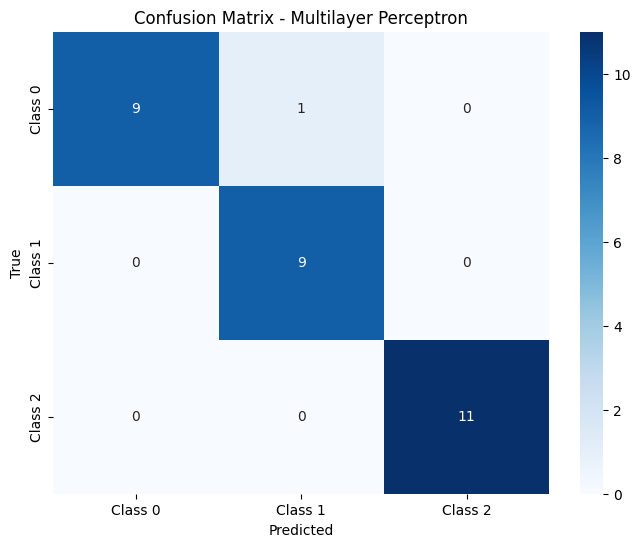

In [17]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(nn_confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix - Multilayer Perceptron')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()